# Autosegmentation in python notebook
- The purpose of this notebook is to build-out the code for a program that can segment out just the kernels from our data regardless of orientation or color balance in the photo.
- To this end I will be experimenting with images 0001 and 9249 becauwe they have opposite orientations and the color balance is quite different(not a techinical term)

In [2]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [4]:
from PIL import Image
import pytesseract

In [7]:
#The following code snip-it reads any file from the internet and saves it to your local directory.
from urllib.request import urlopen, urlretrieve
from imageio import imread, imsave
from matplotlib.pylab import plt
import numpy as np
import colorsys
import matplotlib.colors as colors
from plantcv import plantcv as pcv

img9294 = imread('IMG_9294.JPG')
img0001 = imread('IMG_0001.JPG')

In [8]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


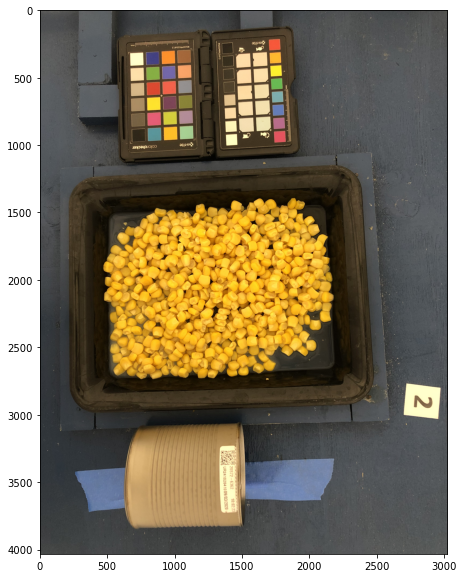

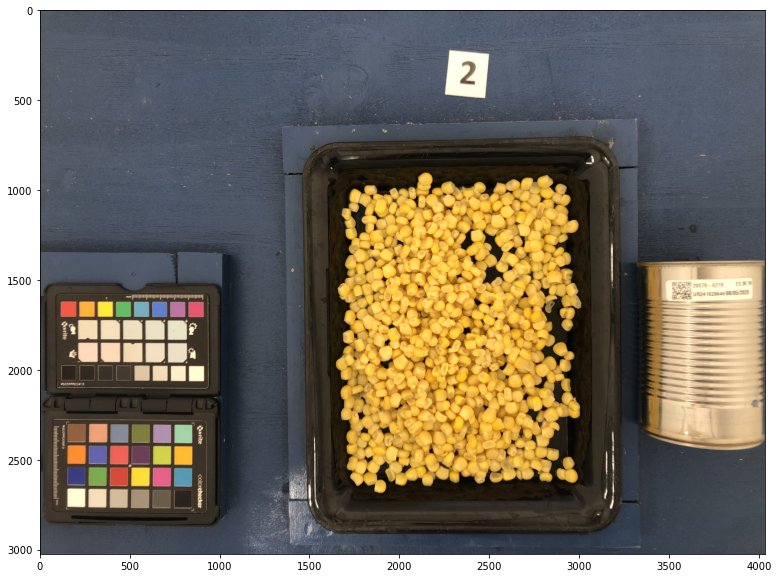

In [10]:
plt.figure(figsize=(20,10));
plt.imshow(img0001)

plt.figure(figsize=(20,10));
plt.imshow(img9294)

In [11]:
hsv = colors.rgb_to_hsv(img9294)

for image in list_of_all_image_names:
    colors.rgb_to_hsv(i)

In [12]:
"""Could the values choosen here bias results later? If we plan to use saturation as a metric we should be relaxed 
in what we decide to filter out in the S channel"""
hmin= 0.15
hmax= 0.2
smin= 0.05
smax= 0.1
vmin= 250
vmax= 275

In [13]:
h1 = hsv[:,:,0] > hmin 
h2 = hsv[:,:,0] < hmax 
s1 = hsv[:,:,1] > smin
s2 = hsv[:,:,1] < smax
v1 = hsv[:,:,2] > vmin
v2 = hsv[:,:,2] < vmax

binary_image = h1 & h2 & s1 & s2 & v1 & v2 

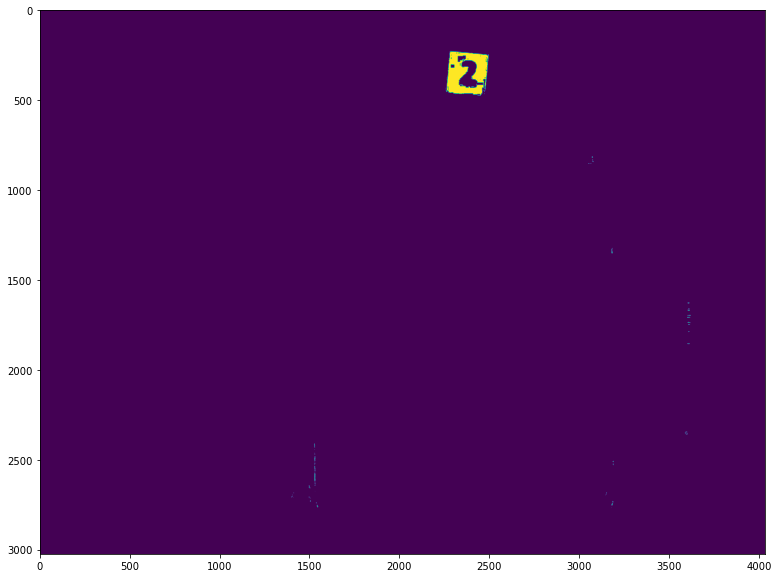

In [14]:
plt.figure(figsize=(20,10));
plt.imshow(binary_image)

In [15]:
masked = pcv.apply_mask(img = img9294, mask = binary_image, mask_color='black').astype(np.uint8)

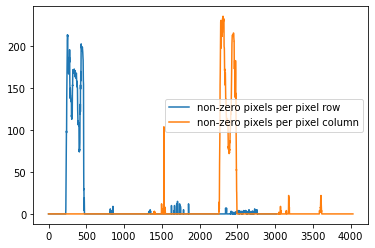

In [16]:
plt.plot(np.sum(binary_image,axis=1), label = 'non-zero pixels per pixel row')
plt.plot(np.sum(binary_image,axis=0), label = 'non-zero pixels per pixel column')
plt.legend()

In [17]:
axis_0=np.where(np.sum(binary_image, axis=0) > 100)
axis_1=np.where(np.sum(binary_image, axis=1) > 100)

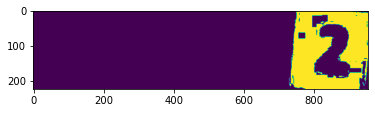

In [18]:
st1=axis_0[0][0]
st2=axis_1[0][0]
en1=axis_0[0][-1]
en2=axis_1[0][-1]
plt.imshow(binary_image[st2:en2,st1:en1])

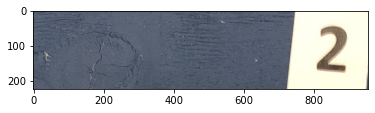

In [19]:
plt.imshow(img9294[st2:en2,st1:en1]) # orientation matters and can't be used on all images

Potential next steps:
- apply hsv to all images 

In [ ]:
plt.imshow(img0001[st2:en2,st1:en1])

In [ ]:
hsv[st2:en2,st1:en1]

In [ ]:
saturation_values = hsv[:,:,2]

In [ ]:
saturation_values.mean()

In [ ]:
print(pytesseract.image_to_string(Image.open('binary_image')))

In [ ]:
print(pytesseract.image_to_string(Image.open('IMG_9294.JPG')))


# Below is code that is used to attempt to do Machinelearning to detect number labels but does not work

In [ ]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

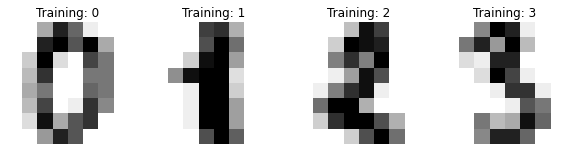

In [21]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [22]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [23]:
predicted = clf.predict(img9294[st2:en2,st1:en1])

ValueError: Found array with dim 3. Estimator expected <= 2.